# Spectral analysis

https://astronn.readthedocs.io/en/latest/neuralnets/apogee_cvae.html

In [18]:
from astroNN.models import ApogeeCVAE
from astroNN.datasets import H5Loader
import h5py
from sklearn.model_selection import train_test_split
import numpy as np

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [7]:
with h5py.File('SLspectra.hdf5', 'r') as hf:
    data_in = hf['flambda'][:]
    wl_in = hf['wl'][:]

In [8]:
data_in.shape

(550, 10000)

In [11]:
x_train,x_test=train_test_split(data_in,test_size=0.33, random_state=42)

In [25]:
y_train = np.random.randint(2, size=x_train.shape[0])
y_test = np.random.randint(2, size=x_test.shape[0])

In [23]:
# And then create an object of Bayesian Convolutional Neural Network classs
cvae_net = ApogeeCVAE()

# Set max_epochs to 10 for a quick result. You should train more epochs normally, especially with dropout
cvae_net.max_epochs = 10


In [24]:
cvae_net.train(x_train,y_train)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_17144/1617019894.py:1: UserWarning: Call to function train() is deprecated and will be removed in future. Use fit() instead.


Number of Training Data: 332, Number of Validation Data: 36
====Message from Normalizer====
You selected mode: 2
Featurewise Center: {'input': True}
Datawise Center: {'input': False} 
Featurewise std Center: {'input': True}
Datawise std Center: {'input': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 2
Featurewise Center: {'output': True}
Datawise Center: {'output': False} 
Featurewise std Center: {'output': True}
Datawise std Center: {'output': False} 
====Message ends====
Epoch 1/10
5/5 - 10s - loss: 38450.0352 - reconstruction_loss: 38447.5312 - kl_loss: 2.5046 - val_loss: 13397.1465 - val_reconstruction_loss: 13396.5781 - val_kl_loss: 0.5681 - lr: 5.0000e-04 - 10s/epoch - 2s/step
Epoch 2/10
5/5 - 7s - loss: 19019.8809 - reconstruction_loss: 19017.2852 - kl_loss: 2.5977 - val_loss: 11960.1201 - val_reconstruction_loss: 11959.2686 - val_kl_loss: 0.8518 - lr: 5.0000e-04 - 7s/epoch - 1s/step
Epoch 3/10
5/5 - 7s - loss: 17609.8789 - reconstruction_loss: 

In [37]:
# Get latent space representation
latent_space_value = cvae_net.test_encoder(x_test)[0]

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_17144/1917556474.py:2: UserWarning: Call to function test_encoder() is deprecated and will be removed in future. Use predict_encoder() instead.
Prediction progress: 100%|█████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 841.33sample/s]


In [38]:
latent_space_value

array([[-0.08478323, -0.19683988],
       [-0.06827664, -0.02643103],
       [-0.04765802, -0.09668121],
       [-0.03780709, -0.04188341],
       [-0.1388493 , -0.08481807],
       [-0.11543087, -0.04213332],
       [-0.13635896, -0.0691778 ],
       [-0.10110508, -0.14690523],
       [-0.03716377, -0.03508704],
       [-0.05399958, -0.03846932],
       [-0.06542622, -0.01081748],
       [-0.14078195, -0.06869388],
       [-0.12966336, -0.14169045],
       [-0.109772  , -0.05495955],
       [-0.06608041, -0.09250879],
       [-0.10395111, -0.09811022],
       [-0.11324004, -0.12650689],
       [-0.05656423, -0.10291295],
       [-0.11993796, -0.08585767],
       [-0.16202095, -0.04940508],
       [-0.04458997, -0.06829437],
       [-0.07623657, -0.02451519],
       [-0.0609493 , -0.02180713],
       [-0.03888493, -0.10186248],
       [-0.10340758, -0.07180613],
       [-0.11487354, -0.05620602],
       [-0.01610626, -0.09942855],
       [-0.13091831, -0.1159637 ],
       [-0.1471388 ,

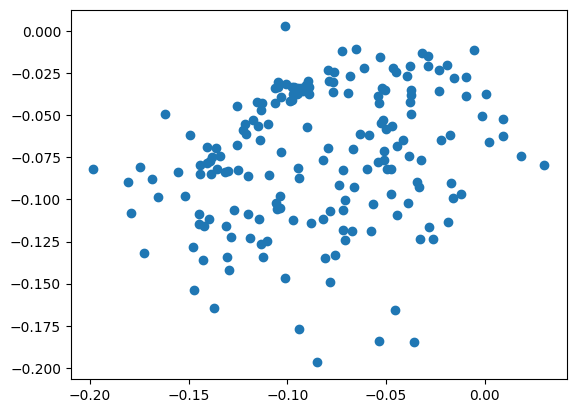

In [39]:
plt.scatter(latent_space_value[:,0],latent_space_value[:,1])
plt.show()

In [41]:
# Get spectra reconstruction
spectra_recon = cvae_net.predict(x_test)


Prediction progress: 100%|█████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 520.32sample/s]


ValueError: could not broadcast input array from shape (182,10000,1) into shape (182,1,1)